<font size=5  color=#003366> **[LELEC2900] - Signal Processing <br><br> 
Python05 - Kalman filtering** </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. B. Macq<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

<font size=5 color=#009999> **1. Preliminary remarks** </font> <br> 

<font size=3 color=#009999> **1.1. About the wording 'filter'** </font> <br> 

In the previous session, FIR and IIR filters have been studied. In this framework, the word *filter* has to be understood as a linear time invariant system which modifies the spectrum of an input signal (e.g. lowpass or highpass filter,...).

In this session, the Kalman filter will be implemented. As explained below, the Kalman filter enables to estimate some variables based on noisy observations. In this context, the word *filter* should be understood as estimation algorithm.

<font size=3 color=#009999> **1.2 Regarding the course LINMA1731** </font> <br> 

Some students taking this signal processing class are also taking the course LINMA1731 - Stochastic processes. The Kalman filter is also covered in that course. We are aware of this overlap. Regarding the objectives for the evaluation: 

- in the course LIMNA1731, the reference are the slides covered by Prof. P.A. Absil + exercise session 5.
- in this course, the reference are the slides and papers covered by Prof. L. Jacques + this Python session.

<font size=5 color=#009999> **2. Kalman equations** </font> <br> 

Let us first recall the general equations of the Kalman filter and predictor.

<font size=3 color=#009999> **2.1 State model** </font> <br> 


Let us assume that a signal $x$ and its observations $y$ can be represented by the following discrete time state model:
	

\begin{equation*}
		\left\lbrace
		\begin{array}{l c l}
			x_{k+1}	& = & Ax_k + Bu_k + Gw_k \\
			y_k		& = & Cx_k + v_k,
		\end{array}\right.
\end{equation*}

where the following notations are introduced:

- $x_{k}$ and $x_{k+1} \in \mathbb R^n$ are the state vectors at time indexes $k$ and $k+1$. The values of these vectors are unknown.
- $u_k \in \mathbb{R}^m$ is a deterministic and known input.  
- $w_k \in \mathbb R^q$ is an additive perturbation noise. This noise is assumed to be Gaussian, i.e. $w_k \sim \mathcal N (0,Q)$ with covariance matrix $Q$. 
- $y_k \in \mathbb R^p$ is the observation measured at time $k$. This observation is assumed to be known.
- $v_k \in \mathbb R^p$ is the observation noise. This noise is assumed to be Gaussian, i.e. $v_k \sim \mathcal N (0,R)$ with covariance matrix $R$. 
- The matrices $A$, $B$, $G$ and $C$ are part of the state model. These matrices are constants (the parameters are assumed to be stationary). 

The initial state is given by $x_0 \sim \mathcal N(\bar x_0,P_0)$. This value is random, Gaussian and unknown. 
The signals $w_k$ and $v_k$ are mutually independent and independent of $x_0$.

The objective here is to estimate the values of $x$ at every time step based on the knowledge

- of the observations $y_k$;
- of the state model;

We can distinguish: 

- the Kalman predictor, predicting the value of the state vector at time $k+1$ based on information at time $k$.
- the Kalman filter, estimating the value of the state vector at time $k$ based on information at time $k$.

<font size=3 color=#009999> **2.2 Kalman predictor** </font> <br> 

The Kalman predictor starts at time 0 with 

- $\hat x_{0|-1} = \bar x_0$, predictor at time 0
- $P_{0|-1} = P_0$, covariance matrix at time zero

For times indexes 1,2,... one has to recursively compute at each step 

- the Kalman predictor gain $K_k = AP_{k|k-1}C^T(CP_{k|k-1}C^T+R)^{-1}$

- the covariance $P_{k+1|k} = AP_{k|k-1}A^T + GQG^T - K_k C P_{k|k-1}A^T$ (Ricatti equation)

- the predictor $\hat x_{k+1|k} = (A-K_k C)\hat x_{k|k-1} + B u_k + K_k y_k$ 

<font size=3 color=#009999> **2.3 Kalman filter** </font> <br> 

The equations of the Kalman filter follow the same principle and are given by 

- estimator $\hat x_{k|k} = \hat x_{k|k-1} + K_k^f \tilde y_{k|k-1}$ where $\tilde y_{k|k-1} = y_k - \hat{y}_{k|k-1}$
- Kalman filter gain $K_k^f = P_{k|k-1}C^T(CP_{k|k-1}C^T+R)^{-1} = A^{-1}K_k$
- Covariance $P_{k|k} = P_{k|k-1} - P_{k|k-1}C^T (C P_{k|k-1}C^T+R)^{-1} C P_{k|k-1}$

<font size=5 color=#009999> **2. Exercises** </font> <br> 

<font size=3 color=#009999> **2.1 Context** </font> <br> 

In this session, we will use the Kalman predictor to track the trajectory of a ballistic missile.

Let us first recall the equations of this type of trajectory.

Let $(x_0,y_0)$ be the initial position of the missile, $v_0$ its initial speed and $\phi_0$ the elevation angle of the shoot.

The initial speed components along the x- and y- axis are given by $(v_{0x},v_{0y})= \big(v_{0}\cos(\phi_0),v_{0}\sin(\phi_0)\big)$

The mass of the missile is here set to 1 kg. 

If the missile is assumed to be in vacuum, the equations of motion are quite simple: 

- the horizontal position is a uniform motion $x(t) = x_0 + v_{0x} t$
- the vertical position is a uniformly accelerated motion (because of the gravity) $y(t) = y_0 + v_{0y}t - \dfrac{gt^2}{2}$ (where $g = 9.81 m/s^2$)

These equations are of course ideal and do not fully reflect the reality. In practise, many other effects have an impact on the motion (rotation of the ball, drag force,...). 

This session contains 3 exercises: 

- in exercise 1, you will implement a Kalman predictor to track a missile with the state model in vacuum, and with a simple Gaussian perturbation
- in exercise 2, you will study the impact of the system parameters on the performance of the filter
- in exercise 3, you will see how to improve the traditional Kalman filter to better model nonlinear effects. 

<font size=3 color=#009999> **2.2 Exercise 1** </font> <br> 

Taking into account the positions and velocities in both dimensions, the state vector is here defined as 

$$\mathbf x = 
\begin{bmatrix}x & v_x & y & v_y\end{bmatrix}^\mathsf T$$

Using the equations of the previous section, the state model is given by 

$$ \mathbf x_{k+1} = \begin{bmatrix}1& \Delta t& 0& 0\\0& 1& 0& 0\\0& 0& 1& \Delta t\\ 0& 0& 0& 1\end{bmatrix} \mathbf x_{k} + \begin{bmatrix}0 \\ 0 \\ 0 \\ -g\Delta t \end{bmatrix} + \begin{bmatrix}1& 0 & 0& 0\\0& 1& 0& 0\\0& 0& 1& 0 \\ 0& 0& 0& 1\end{bmatrix} \mathbf{w}_k $$ 

$$ \mathbf y_k = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} \mathbf x_{k} +  \begin{bmatrix}1 \\ 1 \end{bmatrix} \mathbf{v}_k $$ 

The following notations have been introduced: 

- the factor $\Delta t$ is the time between two successive time steps. 
- the factors $B$ and $u_k$ have been grouped into vector $ \begin{bmatrix} 0 & 0 & 0 & -g\Delta t\end{bmatrix}^\mathsf T$
- the term $\mathbf{w}_k \sim \mathcal N (0,\mathbf{Q})$ has been added to model additional physical effects (mild wind, rotation of the ball,...). Its covariance matrix is given by 

   $$ \mathbf{Q} = \begin{bmatrix}\sigma_1^2& 0 & 0& 0\\0& \sigma_2^2& 0& 0\\0& 0& \sigma_1^2& 0\\ 0& 0& 0&    \sigma_2^2\end{bmatrix} $$ 

   As explained in exercise 3, modeling the physical effects as a Gaussian is actually a very strong (and unrealistic) assumption.

- the term $\mathbf{v}_k \sim \mathcal N (0,\mathbf{R})$ represents the measurement noise in the snapshots of the trajectory. Its covariance matrix is given by 

$$ \mathbf{R} = \begin{bmatrix}\sigma_3^2&0\\0&\sigma_3^2\end{bmatrix} $$

The initial state is given by $\mathbf{x}_0 \sim \mathcal N \big(\overline{ \mathbf{x}}_0,\mathbf{P}_0 \big)$ where 

$$ \overline{\mathbf{x}}_0 = \begin{bmatrix} \overline{x}_0 & \overline{v}_{x0} & \overline{y}_0 & \overline{v}_{y0} \end{bmatrix}^\mathsf T \; \; \text{and} \; \; \mathbf{P}_0 = \begin{bmatrix}\sigma_4^2& 0 & 0& 0\\0& 0 & 0& 0\\0& 0& \sigma_4^2& 0\\ 0& 0& 0& 0 \end{bmatrix} $$ 

(Nb: as slight abuse of notation in the above equations, we use $y$ to denote the vertical position the state vector, and $\mathbf y_k$ to denote the observations).

1. We first have to generate a random trajectory and the noisy measurements that will be used to track this random trajectory. 
   We provide you the necessary constants and matrices in the following cell.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define all the parameters 

# Matrices A,Bu, G and C 

dt = 0.2 # seconds

A = np.array([[1., dt, 0., 0.],   
              [0., 1., 0., 0.], 
              [0., 0., 1., dt], 
              [0., 0., 0., 1.]])  

g = 9.81 #meter per second^2

Bu = np.array([[0., 0., 0., -g*dt]]).T

C = np.array([[1., 0., 0., 0.],
              [0., 0., 1., 0.]])

G =  np.array([[1., 0., 0., 0.],   
              [0., 1., 0., 0.], 
              [0., 0., 1., 0.], 
              [0., 0., 0., 1.]])  

# Matrices Q, R and P_0

sigma_1 = 0.5
sigma_2 = 0.5
sigma_3 = 1.5
sigma_4 = 0.5

Q = np.array([[sigma_1**2, 0, 0., 0.],   
              [0., sigma_2**2, 0., 0.], 
              [0., 0., sigma_1**2, 0], 
              [0., 0., 0., sigma_2**2]]) 

R = np.array([[sigma_3**2, 0],   
              [0., sigma_3**2]]) 

P_0 = np.array([[sigma_4**2, 0, 0., 0.],   
              [0., 0, 0., 0.], 
              [0., 0., sigma_4**2, 0], 
              [0., 0., 0., 0]]) 

# Initial states

x0bar = 15    # meter
y0bar = 15    # meter
vx0bar = 70   # meter per second
vy0bar = 70   # meter per second

x0barvec = np.array([[x0bar, vx0bar, y0bar, vy0bar]]).T

# Number of time steps

Nsteps = 75            

Using the above state model, generate a set of values $\mathbf x_{k}$ and $\mathbf y_{k}$. To do so, fill the following function to generate the trajectory and measurements.

You will find a few hints below: 

- the function *np.random.multivariate_normal* might be useful here. 
- you might use the operator @ to perform matrix multiplications (see Python documentation).
- mind the dimensions of your different variables!

In [2]:
# Function to generate the trajectory and the measurements

def traj_and_mes(A,Bu,C,G,Q,R,x0vec,Nsteps):
    
    # Outputs :
    # - States, a Nsteps x 4 array containing the states at all time indexes 
    # - Measurements, a Nsteps x 2 array containing the observations at all time indexes 
    
    # Your code here
    
    States = x0vec.T
    
    
    y0 = np.expand_dims(np.matmul(C,States[-1]),1) + np.random.normal(scale=np.array([R[0,0],R[1,1]]),size=(1,2))
    Measurements =y0
    
    

    for k in range(Nsteps):
        
        x_k_k1 = np.expand_dims(States[-1],1)


        y_k = (C@x_k_k1 + np.random.normal(scale=np.array([R[0,0],R[1,1]]),size=(1,2)).T).T
        
        
        
        x_k1_k = (A@x_k_k1+Bu).T

        

        States = np.r_[States,x_k1_k]
        
        
        
        Measurements = np.r_[Measurements,y_k]
    
    
    return States, Measurements  



In [3]:
# Generate initial conditions x0vec, and call traj_and_mes to generate the true trajectory and the measurements

# Your code here

Npoints = 80

States, Measurements = traj_and_mes(A,Bu,C,G,Q,R,x0barvec,Npoints)

2. Implement the Kalman predictor to track to trajectory based on the generated snapshots. To do so, fill the function below. 

In [4]:
#Define the Kalman predictor
plt.rcParams["figure.figsize"]=20,10
def Kalman_predictor(A,Bu,C,G,Q,R,P_0,x0barvec,Measurements,Nsteps):
    
    # Output : 
    # - Predicted_states, a Nsteps x 4 array containing the states at all time indexes
    
    # Your code here
        
    Predicted_states =x0barvec.T     
    
    P = P_0
    
    for k in range(Nsteps):
        x_k_k1 = np.expand_dims(Predicted_states[-1],1)
        
        y_k = np.expand_dims(Measurements[k],1)
        
        K_k = A@P@C.T@np.linalg.inv(C@P@C.T+R)
        
    
        P = A@P@A.T+G@Q@G.T-K_k@C@P@A.T
        
        x_k1_k = (((A-K_k@C)@x_k_k1)+Bu+(K_k@y_k)).T
        

        
        Predicted_states = np.r_[Predicted_states,x_k1_k]
    
    
    return Predicted_states





3.   Plot in the same graph

    - the true (and unknown) trajectory;
    - the noisy measurements;
    - the estimated trajectory obtained using the Kalman filter;

In [5]:
# Apply the predictor on the measurements generated in the previous question
Predicted = Kalman_predictor(A,Bu,C,G,Q,R,P_0,x0barvec,Measurements,Npoints)
# Your code here

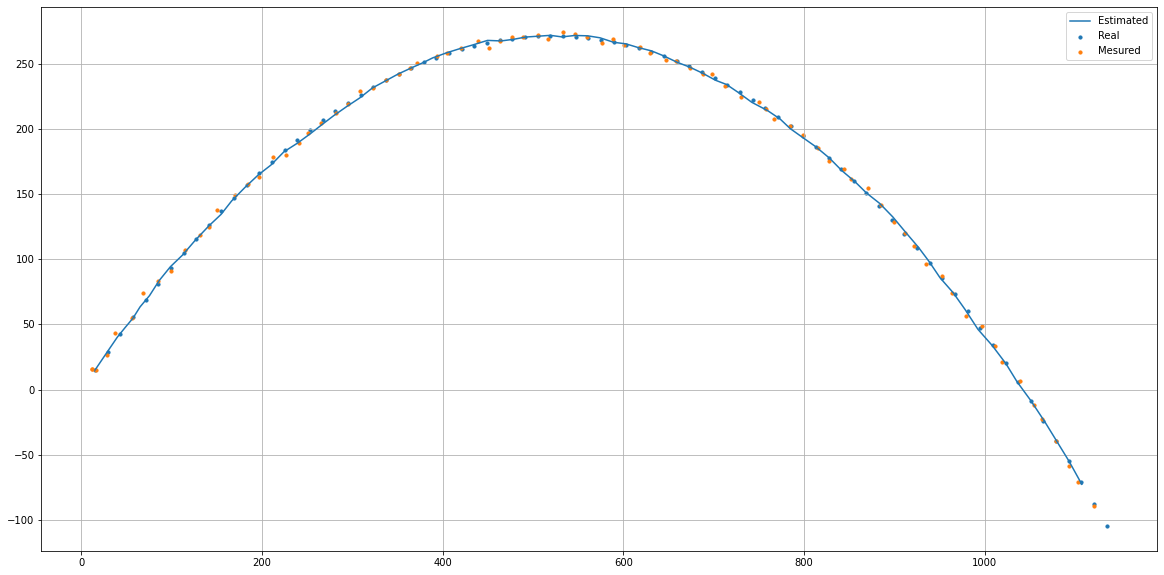

In [6]:
# Plot the true trajectory, the measurements and the predicted positions in the same graph
dot_size = 10

plt.plot(Predicted[:,0],Predicted[:,2],label="Estimated")
plt.scatter(States[:,0],States[:,2],label="Real",s=dot_size)
plt.scatter(Measurements[:,0],Measurements[:,1],label="Mesured",s=dot_size)
plt.legend()
plt.grid()
plt.show()
# Your code here

<font size=3 color=#009999> **2.3 Exercise 2** </font> <br> 

The experiment performed in the previous exercise can be repeated $N_{\exp}$ times (i.e. for $N_{\exp}$ different trajectories). For a given set of parameters, we define the mean square error of the filter as 

$$ \overline{MSE} = \dfrac{1}{N_{\exp} N_{\text{steps}}} \sum_{n=0}^{N_{\exp}} \sum_{k=0}^{N_{\text{steps}}}  \big(x_{n,\text{pred}}(k) - x_{n,\text{true}}(k)\big)^2 + \big(y_{n,\text{pred}}(k) - y_{n,\text{true}}(k)\big)^2$$ 

where $x_{n,\text{pred}}(k)$, $x_{n,\text{true}}(k)$, $y_{n,\text{pred}}(k)$ and $y_{n,\text{true}}(k)$ are the coordinates of the true and estimated positions at time step k in the nth generated trajectory. 

Consider the predictor implemented in the previous exercise. Study the impact on the MSE of the following parameters: 

- the time step $\Delta t$;
- the four variances $\sigma_1^2$,...,$\sigma_4^2$;

For each parameter, plot the MSE versus the values of the parameter. Comment your results.

	 Time step Analysis


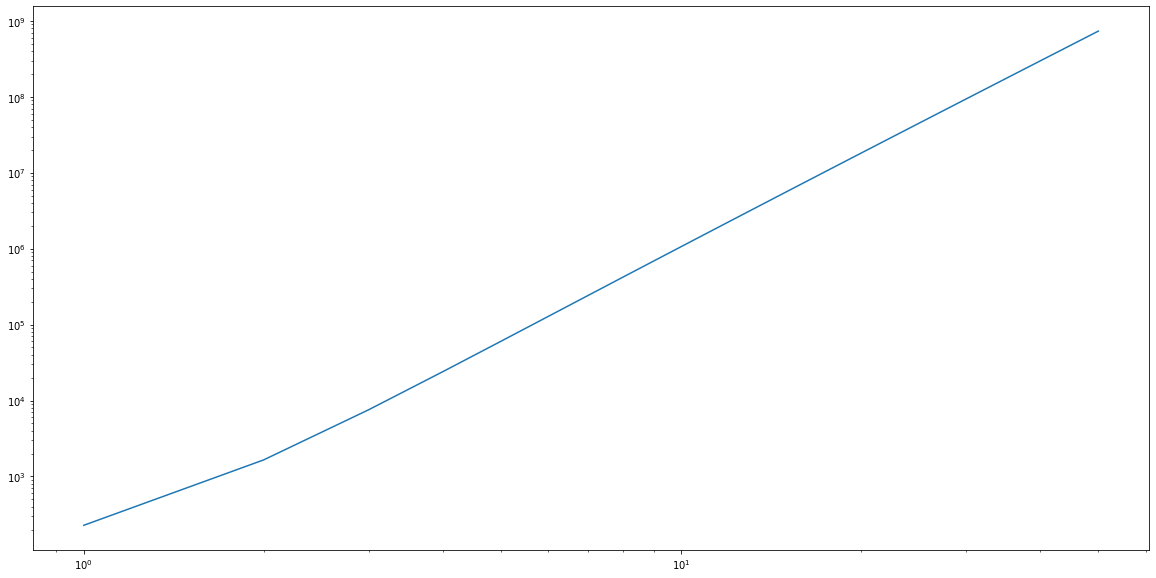

In [7]:
import random as rd
# Your code here
def MSE(N_exp,N_steps,X_pred,X_true,Y_pred,Y_true):
    sub_sum1 = 0
    result = 0
    for i in range(N_exp):
        sub_sum1 = 0
        for k in range(N_steps):
            sub_sum1 += np.square((X_pred[i][k]-X_true[i][k])) + np.square((Y_pred[i][k]-Y_true[i][k]))
        result += sub_sum1
    return result/(N_steps*N_exp)

x_0_l = []
N_exp = 20
Npoints = 100

for k in range(N_exp):
    x_0_l.append(np.array([[rd.random()*100, rd.random()*100, rd.random()*100, rd.random()*100]]).T)
    
# =================================================================
# TIME STEP ANALYSIS
# =================================================================
print("====================================================")
print("\t Time step Analysis")
print("====================================================")
step_range = range(1,51)
MSE_res = []

for step in step_range:
    step = step/10 # the step is between [0.1s, 10s]
    
    # Matrices A,Bu, G and C 

    dt = step # seconds

    A = np.array([[1., dt, 0., 0.],   
                  [0., 1., 0., 0.], 
                  [0., 0., 1., dt], 
                  [0., 0., 0., 1.]])  

    g = 9.81 #meter per second^2

    Bu = np.array([[0., 0., 0., -g*dt]]).T

    C = np.array([[1., 0., 0., 0.],
                  [0., 0., 1., 0.]])

    G =  np.array([[1., 0., 0., 0.],   
                  [0., 1., 0., 0.], 
                  [0., 0., 1., 0.], 
                  [0., 0., 0., 1.]])
    State_res = []
    Pred_res = []
    for x_0 in x_0_l:
        States, Measurements = traj_and_mes(A,Bu,C,G,Q,R,x_0,Npoints)
        Predicted = Kalman_predictor(A,Bu,C,G,Q,R,P_0,x_0,Measurements,Npoints)
        
        State_res.append(States)
        Pred_res.append(Predicted)
        
    State_res = np.array(State_res)
    Pred_res = np.array(Pred_res)

    
    MSE_res.append(MSE(N_exp,Npoints,State_res[:,:,0],Pred_res[:,:,0],State_res[:,:,2],Pred_res[:,:,2]))


plt.plot(step_range,MSE_res)
plt.yscale('log')
plt.xscale('log')
plt.show()







<font size=3 color=#009999> **2.4 To go further (not covered in this course)** </font> <br> 

Modeling the nonlinear effects of the motion as a Gaussian perturbation is of course very inaccurate. In practice, these forces are anything but Gaussian. In [1], an analytical expression
is proposed to model the drag force (wind resistance) as function of the speed of the missile
    
$$F_{drag} = -B_2v^2$$

where $B_2$ is a coefficient derived experimentally and $v = \sqrt{v_x^2+v_y^2}$.

This force can be easily decomposed into its x- and y- components 

$$\begin{aligned}
F_{drag,x} &= -B_2v v_x\\
F_{drag,y} &= -B_2v v_y
\end{aligned}$$

Since we are considering a unit mass body, the acceleration is therefore given by 

$$\begin{aligned} 
a_x &= - B_2 v v_x = - B_2 \sqrt{v_x^2+v_y^2} \; v_x \\
a_y &= - B_2 v v_y = - B_2 \sqrt{v_x^2+v_y^2} \; v_y
\end{aligned}$$

Stil for a unit mass body, a possible approximation for $B_2$ is given by 

$$B_2 = 0.0039 + \frac{0.0058}{1+\exp{[(v-35)/5]}}$$

The above expressions depend on the speed in a nonlinear manner. The traditional Kalman filter that has been used so far can not properly takes nonlinear forces into account. The required state model must be of the form $x_{k+1} = Ax_k + Bu_k + Gw_k$ where the future state only linearly depends on the previous one, and where the terms $Bu_k + Gw_k$ are independent of $x_k$. The expression of the drag force can not be captured by such state model. 

For this reason, we can fortunately resort to the *extended Kalman filter* (EKF) or the *unscented Kalman filter* (UKF). These filters are improved versions of the traditional KF enabling to deal with nonlinear state models. 

In this exercise, you are asked to implement these two filters and to apply them on the previous scenario (including the drag force). Compare their performances.

Nb: since the EKF and UKF have not been covered during the lecture, this exercise is left as 'challenge'. You will have to search in the litterature/on the web to find out how to implement these filters. Here are a few potential webpages: 

- https://www.cs.cmu.edu/~motionplanning/papers/sbp_papers/kalman/ekf_lecture_notes.pdf
- https://stanford.edu/class/ee363/lectures/ekf.pdf
- https://www.seas.harvard.edu/courses/cs281/papers/unscented.pdf
- https://www.cse.sc.edu/~terejanu/files/tutorialUKF.pdf

In [4]:
# Your code here 

<font size=3 color=#009999> **Reference** </font> <br> 

[1] N. Giordano, H. Nakanishi, *Computational Physics*, 1997